In [1]:
import sklearn 
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import scipy
import os
import sys
import glob
import numpy as np
from sklearn.externals import joblib
from random import shuffle
import scipy.io.wavfile
from python_speech_features import mfcc

In [2]:
def create_ceps(wavfile):
    sampling_rate, song_array = scipy.io.wavfile.read(wavfile)
    """Get MFCC
    ceps  : ndarray of MFCC
    mspec : ndarray of log-spectrum in the mel-domain
    spec  : spectrum magnitude
    """
    ceps=mfcc(song_array)
    #this is done in order to replace NaN and infinite value in array
    bad_indices = np.where(np.isnan(ceps))
    b=np.where(np.isinf(ceps))
    ceps[bad_indices]=0
    ceps[b]=0
    write_ceps(ceps, wavfile)

# Saves mfcc data 
def write_ceps(ceps, wavfile):
    base_wav, ext = os.path.splitext(wavfile)
    data_wav = base_wav + ".ceps"
    np.save(data_wav, ceps)
    


In [3]:
"""reads MFCC-files and prepares X_train and y_train.
genre_list must consist of names of folders/genres consisting of the required MFCC-files
base_dir must contain genre_list of directories
"""
def read_ceps(genre_list, base_dir):
    X= []
    y=[]
    for label, genre in enumerate(genre_list):
#        for fn in glob.glob(os.path.join(base_dir, genre, "*.ceps.npy")):
        for fn in glob.glob(os.path.join(base_dir, genre, "*.wav")):
            create_ceps(fn)
            cepsname = fn[:-3] + "ceps.npy"
            ceps = np.load(cepsname)
            num_ceps = len(ceps)
            X.append(np.mean(ceps[int(num_ceps*1/10):int(num_ceps*9/10)], axis=0))
            #X.append(ceps)
            y.append(label)

    print(np.array(X).shape)
    print(len(y))
    return np.array(X), np.array(y)

In [4]:
def logisticReg(X_train, y_train, X_test, y_test, genre_list):

    print(len(X_train))
    print(len(X_train[0]))

    #Logistic Regression classifier

    logistic_classifier = linear_model.logistic.LogisticRegression()
    logistic_classifier.fit(X_train, y_train)
    logistic_predictions = logistic_classifier.predict(X_test)
    logistic_accuracy = accuracy_score(y_test, logistic_predictions)
    logistic_cm = confusion_matrix(y_test, logistic_predictions)
    print("logistic accuracy = " + str(logistic_accuracy))
    print("logistic_cm:")
    print(logistic_cm)

    plot_confusion_matrix(logistic_cm, "Confusion matrix", genre_list)


In [5]:
def plot_confusion_matrix(cm, title, genre_list, cmap=plt.cm.RdBu):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(genre_list))
    plt.xticks(tick_marks, genre_list, rotation=45)
    plt.yticks(tick_marks, genre_list)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Getting MFCC features ... 
(199, 13)
199
Split into train and test ...
Train and test with logistic regression
99
13
logistic accuracy = 0.87
logistic_cm:
[[47  4]
 [ 9 40]]


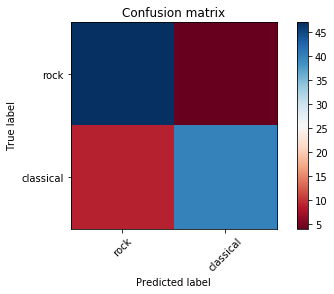

******Done*************


In [6]:

def main():
    base_dir_mfcc = '../data/'
    
    genre_list = [ "rock","classical"]
    print("Getting MFCC features ... ")
    X,y= read_ceps(genre_list, base_dir_mfcc)
    print("Split into train and test ...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .50)
    print("Train and test with logistic regression")
    logisticReg(X_train, y_train, X_test, y_test, genre_list)
    print('******Done*************')
    

if __name__ == "__main__":
    main()